### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [66]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [80]:
df = pd.read_csv('cleaned_df.csv', index_col = 'Unnamed: 0')

In [81]:
df.head()

,Name,Type,Breed,Color,Sex,Size,Animal ID,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,DOB,IntakeDate,IntakeAge,IntakeAgeYrs
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,A384994,0,QUARANTINE,FLD_STRAY,EUTHANIZE,UNKNOWN,*SEBASTOPOL,BAT,BROWN,NaN,2019-03-17,NaN,-1.00
1,NaN,CAT,DOMESTIC SH,CREAM,Female,SMALL,A372719,0,STRAY,FIELD,EUTHANIZE,TREATABLE/REHAB,SANTA ROSA,DOMESTIC SH,CREAM,NaN,2018-05-21,NaN,-1.00
2,NaN,OTHER,BAT,BLACK,Unknown,SMALL,A385008,1,QUARANTINE,FLD_STRAY,EUTHANIZE,UNTREATABLE,SANTA ROSA,BAT,BLACK,NaN,2019-03-18,NaN,-1.00
3,DAISY,CAT,DOMESTIC MH,WHITE/TAN,Spayed,MED,A372551,7,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNKNOWN,SANTA ROSA,DOMESTIC MH,WHITE,2010-05-15,2018-05-15,2922 days 00:00:00.000000000,8.01
4,NaN,CAT,DOMESTIC SH,CALICO/SEAL PT,Female,SMALL,A375772,4,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC SH,CALICO,2005-09-04,2018-09-04,4748 days 00:00:00.000000000,13.01


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16457 entries, 0 to 16791
Data columns (total 19 columns):
Name                   12450 non-null object
Type                   16457 non-null object
Breed                  16457 non-null object
Color                  16457 non-null object
Sex                    16457 non-null object
Size                   16457 non-null object
Animal ID              16457 non-null object
Days in Shelter        16457 non-null int64
Intake Type            16457 non-null object
Intake Subtype         16457 non-null object
Outcome Type           16457 non-null object
Intake Condition       16457 non-null object
Intake Jurisdiction    16457 non-null object
PredomBreed            16457 non-null object
PredomColor            16457 non-null object
DOB                    12680 non-null object
IntakeDate             16457 non-null object
IntakeAge              12680 non-null object
IntakeAgeYrs           16457 non-null float64
dtypes: float64(1), int64(1), object

In [83]:
df.describe()

,Days in Shelter,IntakeAgeYrs
count,16457.000000,16457.000000
mean,17.153734,2.415546
std,28.458548,3.880925
min,0.000000,-1.000000
25%,1.000000,0.080000
50%,9.000000,0.950000
75%,22.000000,3.770000
max,791.000000,25.950000


In [84]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Animal ID',
       'Days in Shelter', 'Intake Type', 'Intake Subtype', 'Outcome Type',
       'Intake Condition', 'Intake Jurisdiction', 'PredomBreed', 'PredomColor',
       'DOB', 'IntakeDate', 'IntakeAge', 'IntakeAgeYrs'],
      dtype='object')

# Feature Engineering

In [85]:
df.drop(['Name','Breed','Color','Animal ID','DOB','IntakeDate','IntakeAge'], axis=1, inplace=True)

In [86]:
df.head()

,Type,Sex,Size,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,IntakeAgeYrs
0,OTHER,Unknown,SMALL,0,QUARANTINE,FLD_STRAY,EUTHANIZE,UNKNOWN,*SEBASTOPOL,BAT,BROWN,-1.00
1,CAT,Female,SMALL,0,STRAY,FIELD,EUTHANIZE,TREATABLE/REHAB,SANTA ROSA,DOMESTIC SH,CREAM,-1.00
2,OTHER,Unknown,SMALL,1,QUARANTINE,FLD_STRAY,EUTHANIZE,UNTREATABLE,SANTA ROSA,BAT,BLACK,-1.00
3,CAT,Spayed,MED,7,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNKNOWN,SANTA ROSA,DOMESTIC MH,WHITE,8.01
4,CAT,Female,SMALL,4,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC SH,CALICO,13.01


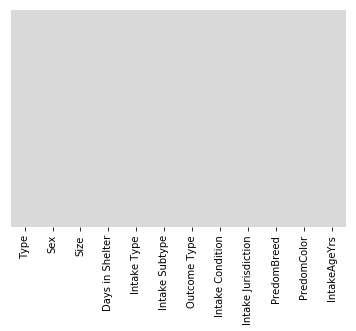

In [87]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [89]:
df.reset_index(drop=True, inplace=True)

## Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

In [43]:
from collections import defaultdict

In [44]:
d = defaultdict(LabelEncoder)

In [90]:
# Encoding the variable
fit = df.drop(['Days in Shelter', 'IntakeAgeYrs'], axis=1).apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
encoded = df.drop(['Days in Shelter', 'IntakeAgeYrs'], axis=1).apply(lambda x: d[x.name].transform(x))

In [91]:
modeling = pd.concat([encoded, df[['Days in Shelter', 'IntakeAgeYrs']].copy()], axis=1)

In [92]:
modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16457 entries, 0 to 16456
Data columns (total 12 columns):
Type                   16457 non-null int64
Sex                    16457 non-null int64
Size                   16457 non-null int64
Intake Type            16457 non-null int64
Intake Subtype         16457 non-null int64
Outcome Type           16457 non-null int64
Intake Condition       16457 non-null int64
Intake Jurisdiction    16457 non-null int64
PredomBreed            16457 non-null int64
PredomColor            16457 non-null int64
Days in Shelter        16457 non-null int64
IntakeAgeYrs           16457 non-null float64
dtypes: float64(1), int64(11)
memory usage: 1.5 MB


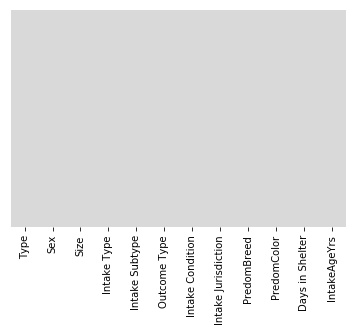

In [93]:
sns.heatmap(modeling.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

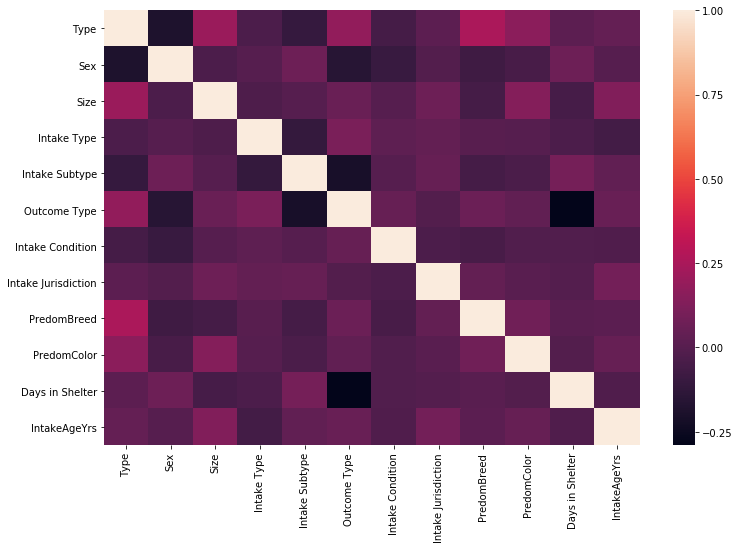

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(modeling.corr())

## Interaction Features

In [95]:
features = modeling.drop(['Outcome Type'], axis = 1).copy()

In [96]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [97]:
features = pd.DataFrame(poly.fit_transform(features), columns=poly.get_feature_names(input_features=features.columns))

In [98]:
features.describe()

,Type,Sex,Size,Intake Type,Intake Subtype,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,Days in Shelter,IntakeAgeYrs,Type Sex,Type Size,Type Intake Type,Type Intake Subtype,Type Intake Condition,Type Intake Jurisdiction,Type PredomBreed,Type PredomColor,Type Days in Shelter,Type IntakeAgeYrs,Sex Size,Sex Intake Type,Sex Intake Subtype,Sex Intake Condition,Sex Intake Jurisdiction,Sex PredomBreed,Sex PredomColor,Sex Days in Shelter,Sex IntakeAgeYrs,Size Intake Type,Size Intake Subtype,Size Intake Condition,Size Intake Jurisdiction,Size PredomBreed,Size PredomColor,Size Days in Shelter,Size IntakeAgeYrs,Intake Type Intake Subtype,Intake Type Intake Condition,Intake Type Intake Jurisdiction,Intake Type PredomBreed,Intake Type PredomColor,Intake Type Days in Shelter,Intake Type IntakeAgeYrs,Intake Subtype Intake Condition,Intake Subtype Intake Jurisdiction,Intake Subtype PredomBreed,Intake Subtype PredomColor,Intake Subtype Days in Shelter,Intake Subtype IntakeAgeYrs,Intake Condition Intake Jurisdiction,Intake Condition PredomBreed,Intake Condition PredomColor,Intake Condition Days in Shelter,Intake Condition IntakeAgeYrs,Intake Jurisdiction PredomBreed,Intake Jurisdiction PredomColor,Intake Jurisdiction Days in Shelter,Intake Jurisdiction IntakeAgeYrs,PredomBreed PredomColor,PredomBreed Days in Shelter,PredomBreed IntakeAgeYrs,PredomColor Days in Shelter,PredomColor IntakeAgeYrs,Days in Shelter IntakeAgeYrs
count,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000
mean,0.722428,2.066962,2.513642,3.445342,7.663669,1.068117,9.143890,28.010026,6.928055,17.153734,2.415546,1.369630,2.020781,2.468858,5.157562,0.725345,6.621134,22.158656,5.668955,12.764781,1.844763,5.139697,7.123169,16.312876,2.050252,18.881570,56.859877,13.967977,37.770493,5.000982,8.614814,19.270462,2.685544,23.145531,69.260254,19.044601,40.846934,6.930347,25.645500,3.721638,31.566628,96.605092,23.856171,58.089992,8.073169,8.194203,70.529015,210.229993,51.600352,148.301209,19.399173,9.706629,29.079298,7.235280,17.641733,2.473777,256.825545,63.462843,156.701221,22.577950,201.205505,484.568330,68.294930,117.114784,18.054690,39.312790
std,0.592350,1.114992,1.666012,1.100699,6.176820,1.458522,1.397513,12.599100,7.044173,28.458548,3.880925,1.627586,2.284181,2.279326,7.098868,1.590652,5.534907,22.744486,8.642696,30.394968,3.583111,4.898346,4.669493,16.942358,3.674428,10.631307,40.974095,17.684853,72.623370,8.938926,6.631386,23.340894,4.870514,15.996020,56.944013,25.636332,78.661077,13.791375,25.467052,5.384385,11.219241,55.115894,26.664185,108.437993,14.159105,15.444557,58.740851,206.177930,79.160656,365.929639,41.908642,13.459828,45.499117,15.909841,49.505969,8.901735,124.665166,66.058703,262.542082,36.925305,249.102307,945.506308,121.387912,297.817631,44.430499,148.680134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [99]:
modeling = pd.concat([features, modeling['Outcome Type']],axis=1)

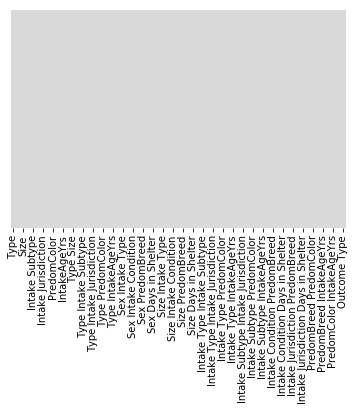

In [100]:
sns.heatmap(modeling.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [101]:
modeling.to_csv('encoded_data.csv')

# Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(modeling.drop('Outcome Type', axis=1), modeling['Outcome Type'], test_size=0.2, random_state=42)

# Over Sampling with SMOTE

In [75]:
from imblearn.over_sampling import SMOTE

In [103]:
sm = SMOTE(sampling_strategy='not majority', random_state=23, n_jobs = -1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [105]:
unique_elements, counts_elements = np.unique(y_train_sm, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1    2    3]
 [4495 4495 4495 4495]]


# Models

In [110]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

## Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

### Without upsampled training data

In [107]:
lr = LogisticRegression(penalty='l2',C=1.0,fit_intercept=False,random_state=10,solver='lbfgs',multi_class='multinomial',verbose=2,n_jobs=-1)

In [132]:
lr.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=2, warm_start=False)

In [109]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [139]:
print('f1 train: ', f1_score(y_train, pred_train, average='micro'))
print('f1 test: ', f1_score(y_test, pred_test, average='micro'))
print('Accuracy test: ', accuracy_score(y_test, pred_test))

f1 train:  0.7310292442081276
f1 test:  0.7193195625759418
Accuracy test:  0.7193195625759417


Text(42.0, 0.5, 'True Label')

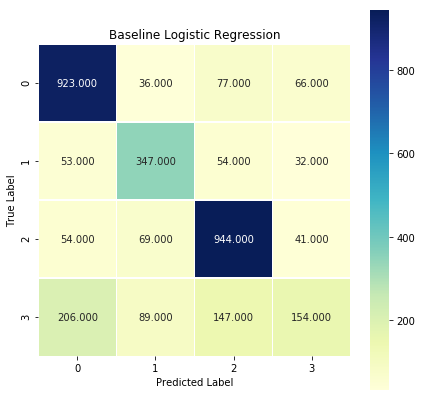

In [124]:
cm_lr = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Baseline Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [122]:
d['Outcome Type'].inverse_transform([0,1,2,3])

array(['ADOPTION', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER'],
      dtype=object)

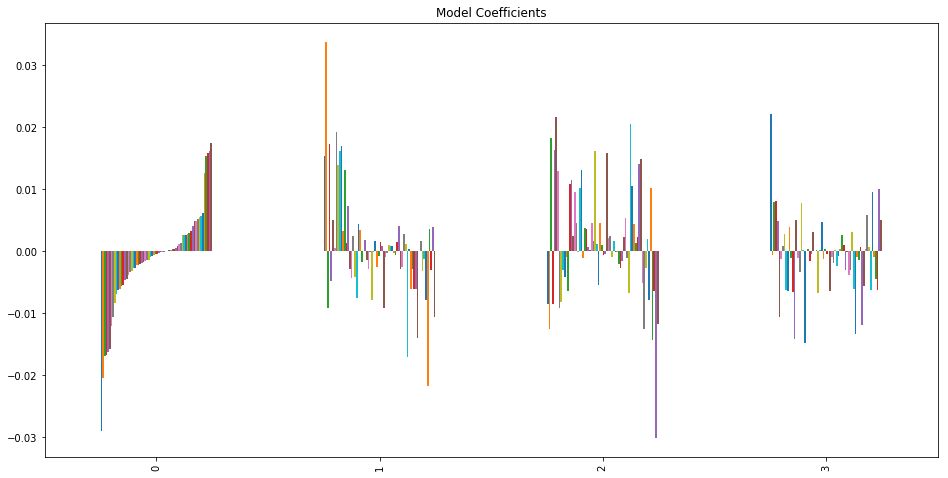

In [129]:
coef = pd.DataFrame(data=lr.coef_ )
coef.columns = features.columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(16,8),)

### With Upsampled training data

In [130]:
lr_sm = LogisticRegression(penalty='l2',C=1.0,fit_intercept=False,random_state=10,solver='lbfgs',multi_class='multinomial',verbose=2,n_jobs=-1)

In [133]:
lr_sm.fit(X_train_sm,y_train_sm)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=2, warm_start=False)

In [134]:
pred_train_lrsm = lr_sm.predict(X_train)
pred_test_lrsm = lr_sm.predict(X_test)

In [137]:
print('f1 train: ', f1_score(y_train, pred_train_lrsm, average='micro'))
print('f1 test: ', f1_score(y_test, pred_test_lrsm, average='micro'))
print('Accuracy test: ', accuracy_score(y_test, pred_test_lrsm))


f1 train:  0.7019369540448158
f1 test:  0.6938031591737546
Accuracy test:  0.6938031591737546


Text(42.0, 0.5, 'True Label')

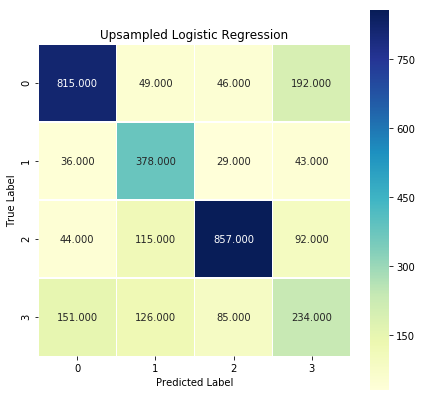

In [136]:
cm_lrsm = confusion_matrix(y_test, pred_test_lrsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_lrsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Decision Tree

In [253]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [142]:
dtc = DecisionTreeClassifier()

### Without Upsampling

In [160]:
params = dict(criterion=['gini', 'entropy'],
    max_depth=[9,10,11],
    min_samples_leaf=[.0001,.0005, .001])

In [161]:
rs_tree = RandomizedSearchCV(dtc, params, cv=10,scoring='accuracy', verbose=2, n_jobs=-1)

In [162]:
rs_tree.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.4s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [9, 10, 11], 'min_samples_leaf': [0.0001, 0.0005, 0.001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [163]:
rs_tree.best_params_

{'min_samples_leaf': 0.0005, 'max_depth': 10, 'criterion': 'gini'}

In [164]:
pred_train_tree = rs_tree.best_estimator_.predict(X_train)
pred_test_tree = rs_tree.best_estimator_.predict(X_test)

In [165]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_tree))
print('Accuracy test: ', accuracy_score(y_test, pred_test_tree))

Accuracy train:  0.8672996581845803
Accuracy test:  0.827460510328068


Text(42.0, 0.5, 'True Label')

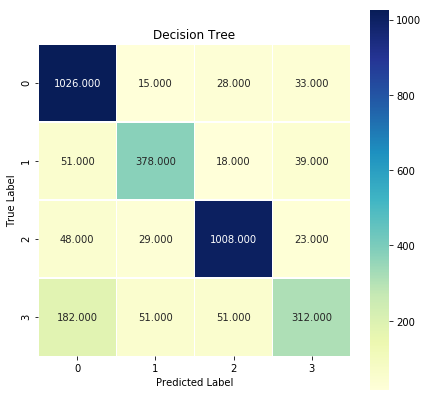

In [166]:
cm_tree = confusion_matrix(y_test, pred_test_tree)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_tree, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### With Upsampling

In [175]:
params_sm = dict(criterion=['gini', 'entropy'],
    max_depth=[12,13,14],
    min_samples_leaf=[.0001,.0005, .001])

In [176]:
rs_tree_sm = RandomizedSearchCV(dtc, params_sm, cv=10,scoring='accuracy', verbose=2, n_jobs=-1)

In [177]:
rs_tree_sm.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.9s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [12, 13, 14], 'min_samples_leaf': [0.0001, 0.0005, 0.001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [178]:
rs_tree_sm.best_params_

{'min_samples_leaf': 0.0001, 'max_depth': 13, 'criterion': 'entropy'}

In [179]:
pred_train_treesm = rs_tree_sm.best_estimator_.predict(X_train)
pred_test_treesm = rs_tree_sm.best_estimator_.predict(X_test)

In [180]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_treesm))
print('Accuracy test: ', accuracy_score(y_test, pred_test_treesm))

Accuracy train:  0.9160653247246487
Accuracy test:  0.8280680437424058


Text(42.0, 0.5, 'True Label')

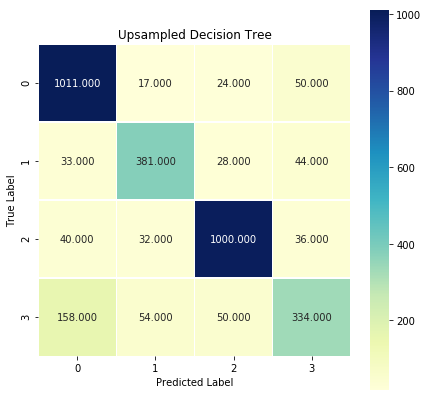

In [182]:
cm_treesm = confusion_matrix(y_test, pred_test_treesm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_treesm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [183]:
importances = rs_tree_sm.best_estimator_.feature_importances_

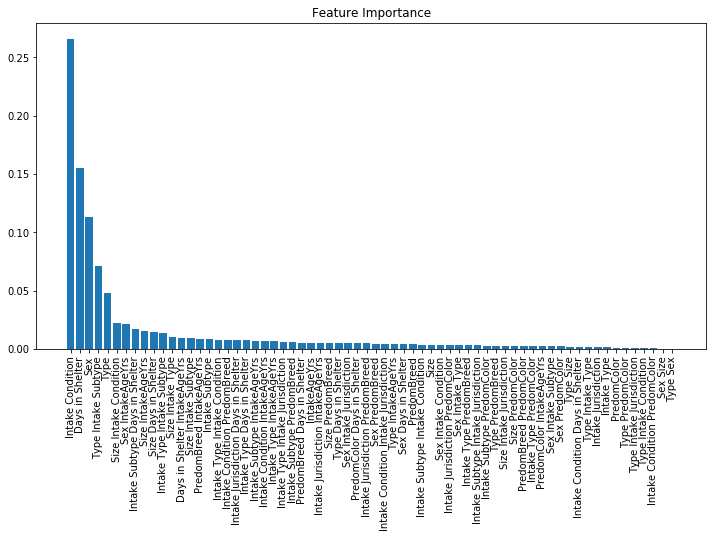

In [189]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [modeling.drop('Outcome Type', axis=1).columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(len(modeling.drop('Outcome Type', axis=1).columns)), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(len(modeling.drop('Outcome Type', axis=1).columns)), names, rotation=90)
# Show plot
plt.show()

## KNN

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [193]:
knn = KNeighborsClassifier(n_jobs=-1)

### Without upsampling

In [202]:
params_knn = dict(n_neighbors=[13,16,20],weights=['uniform','distance'],p=[1,2,3])

In [203]:
rs_knn = RandomizedSearchCV(knn, params_knn, cv=10,scoring='accuracy', verbose=2, n_jobs=-1)

In [204]:
rs_knn.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.2min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_neighbors': [13, 16, 20], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [205]:
rs_knn.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 16}

In [206]:
pred_train_knn = rs_knn.best_estimator_.predict(X_train)
pred_test_knn = rs_knn.best_estimator_.predict(X_test)

In [207]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_knn))
print('Accuracy test: ', accuracy_score(y_test, pred_test_knn))

Accuracy train:  0.9982529434105583
Accuracy test:  0.7913122721749696


Text(42.0, 0.5, 'True Label')

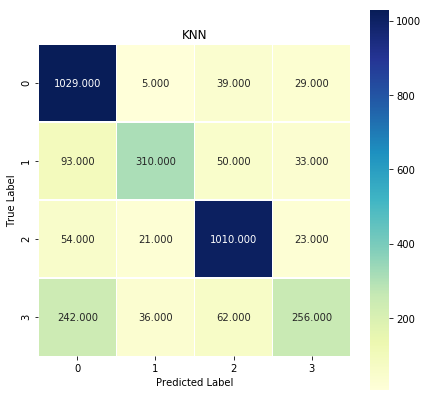

In [208]:
cm_knn = confusion_matrix(y_test, pred_test_knn)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_knn, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### With Upsampling

In [209]:
params_knnsm = dict(n_neighbors=[10,15,20],weights=['uniform','distance'],p=[1,2,3])

In [210]:
rs_knnsm = RandomizedSearchCV(knn, params_knnsm, cv=10,scoring='accuracy', verbose=2, n_jobs=-1)

In [211]:
rs_knnsm.fit(X_train_sm,y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.0min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_neighbors': [10, 15, 20], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [212]:
rs_knnsm.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 10}

In [213]:
pred_train_knnsm = rs_knnsm.best_estimator_.predict(X_train)
pred_test_knnsm = rs_knnsm.best_estimator_.predict(X_test)

In [214]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_knnsm))
print('Accuracy test: ', accuracy_score(y_test, pred_test_knnsm))

Accuracy train:  0.9982529434105583
Accuracy test:  0.7794653705953828


Text(42.0, 0.5, 'True Label')

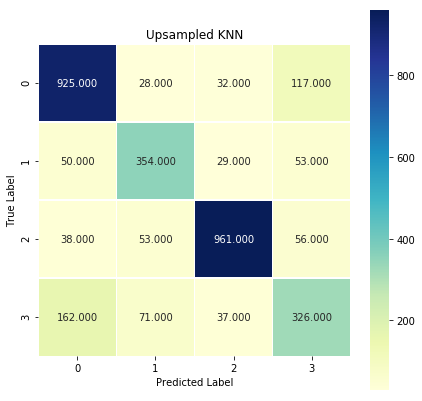

In [215]:
cm_knnsm = confusion_matrix(y_test, pred_test_knnsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_knnsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
rfc = RandomForestClassifier()

### Without Upsampling

In [222]:
params_rfc = dict(n_estimators=[100,150,200],max_depth=[12,15,18],min_samples_leaf=[.00001,.00005,.0001])

In [223]:
rs_rfc = RandomizedSearchCV(rfc, params_rfc, cv=10,scoring='accuracy', verbose=2, n_jobs=-1)

In [224]:
rs_rfc.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 150, 200], 'max_depth': [12, 15, 18], 'min_samples_leaf': [1e-05, 5e-05, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [225]:
rs_rfc.best_params_

{'n_estimators': 200, 'min_samples_leaf': 5e-05, 'max_depth': 18}

In [226]:
pred_train_rfc = rs_rfc.best_estimator_.predict(X_train)
pred_test_rfc = rs_rfc.best_estimator_.predict(X_test)

In [227]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_rfc))
print('Accuracy test: ', accuracy_score(y_test, pred_test_rfc))

Accuracy train:  0.9701481200151918
Accuracy test:  0.8614823815309842


Text(42.0, 0.5, 'True Label')

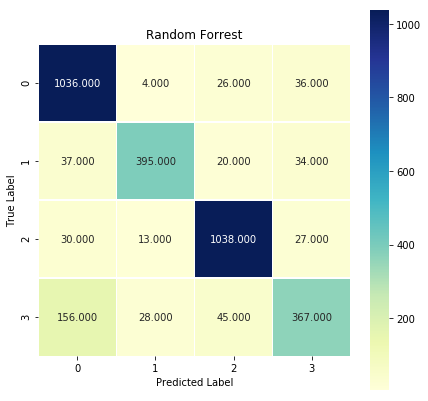

In [229]:
cm_rfc = confusion_matrix(y_test, pred_test_rfc)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_rfc, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Random Forrest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### With Upsampling

In [230]:
params_rfcsm = dict(n_estimators=[100,150,200],max_depth=[12,15,18],min_samples_leaf=[.00001,.00005,.0001])

In [231]:
rs_rfcsm = RandomizedSearchCV(rfc, params_rfcsm, cv=10,scoring='accuracy', verbose=2, n_jobs=-1)

In [232]:
rs_rfcsm.fit(X_train_sm,y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 150, 200], 'max_depth': [12, 15, 18], 'min_samples_leaf': [1e-05, 5e-05, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [233]:
rs_rfcsm.best_params_

{'n_estimators': 100, 'min_samples_leaf': 5e-05, 'max_depth': 18}

In [234]:
pred_train_rfcsm = rs_rfcsm.best_estimator_.predict(X_train)
pred_test_rfcsm = rs_rfcsm.best_estimator_.predict(X_test)

In [235]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_rfcsm))
print('Accuracy test: ', accuracy_score(y_test, pred_test_rfcsm))

Accuracy train:  0.9750094948727687
Accuracy test:  0.8599635479951397


Text(42.0, 0.5, 'True Label')

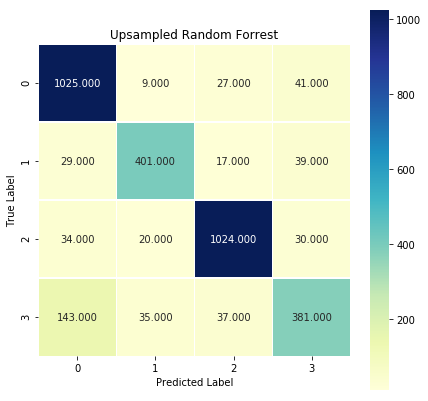

In [236]:
cm_rfcsm = confusion_matrix(y_test, pred_test_rfcsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_rfcsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled Random Forrest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## XGBoosted

In [238]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [239]:
xgb = XGBClassifier(objective='multi:softmax',booster='gbtree')

### Without Upsampling

In [240]:
params_xgb = dict(max_depth=[3,5,10],learning_rate=[.05,0.1,.3],n_estimators=[50,100,200])

In [241]:
rs_xgb = RandomizedSearchCV(xgb, params_xgb, cv=10,scoring='accuracy', verbose=2, n_jobs=-1)

In [242]:
rs_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 21.1min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [3, 5, 10], 'learning_rate': [0.05, 0.1, 0.3], 'n_estimators': [50, 100, 200]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [243]:
rs_xgb.best_params_

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

In [244]:
pred_train_xgb = rs_xgb.best_estimator_.predict(X_train)
pred_test_xgb = rs_xgb.best_estimator_.predict(X_test)

In [245]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_xgb))
print('Accuracy test: ', accuracy_score(y_test, pred_test_xgb))

Accuracy train:  0.9351310292442081
Accuracy test:  0.8639125151883353


Text(42.0, 0.5, 'True Label')

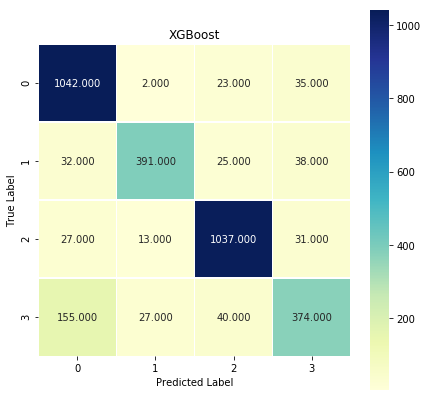

In [246]:
cm_xgb = confusion_matrix(y_test, pred_test_xgb)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgb, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [306]:
rs_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [274]:
importance = rs_xgb.best_estimator_.feature_importances_

In [293]:
import pickle

In [294]:
model_pickle_path = 'xgboost_model.pkl'

# Create an variable to pickle and open it in write mode
model_pickle = open(model_pickle_path, 'wb')
pickle.dump(rs_xgb, model_pickle)
model_pickle.close()

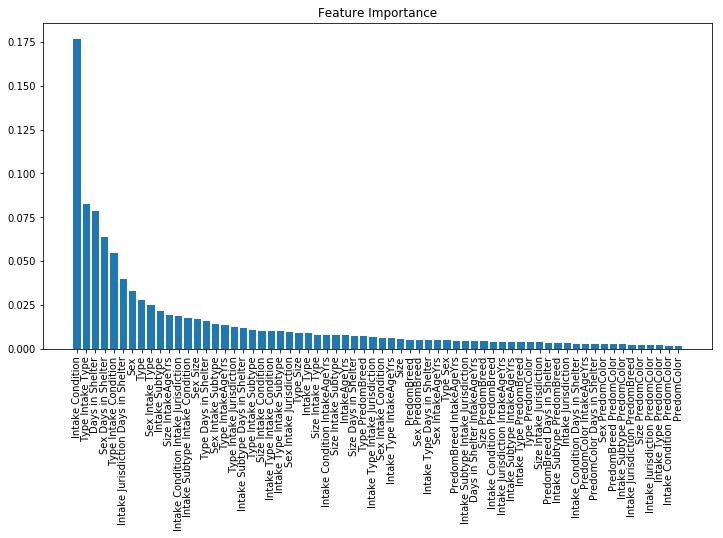

In [278]:
# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [modeling.drop('Outcome Type', axis=1).columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(len(modeling.drop('Outcome Type', axis=1).columns)), importance[indices])
# Add feature names as x-axis labels
plt.xticks(range(len(modeling.drop('Outcome Type', axis=1).columns)), names, rotation=90)
# Show plot
plt.show()

In [281]:
list(zip(names,importance[indices]))

[('Intake Condition', 0.17676412),
 ('Type Intake Type', 0.082894616),
 ('Days in Shelter', 0.07842767),
 ('Sex Days in Shelter', 0.0640334),
 ('Type Intake Condition', 0.054804936),
 ('Intake Jurisdiction Days in Shelter', 0.040175404),
 ('Sex', 0.033186343),
 ('Type', 0.028023995),
 ('Sex Intake Type', 0.02485914),
 ('Intake Subtype', 0.021968156),
 ('Size IntakeAgeYrs', 0.019419389),
 ('Intake Condition Intake Jurisdiction', 0.019103281),
 ('Intake Subtype Intake Condition', 0.017547863),
 ('Sex Size', 0.01734966),
 ('Type Days in Shelter', 0.015872346),
 ('Sex Intake Subtype', 0.014417817),
 ('Type IntakeAgeYrs', 0.013768475),
 ('Type Intake Jurisdiction', 0.012683048),
 ('Intake Subtype Days in Shelter', 0.012311919),
 ('Type Intake Subtype', 0.010973827),
 ('Size Intake Condition', 0.010355779),
 ('Intake Type Intake Condition', 0.010298167),
 ('Intake Type Intake Subtype', 0.010116705),
 ('Sex Intake Jurisdiction', 0.010052768),
 ('Type Size', 0.00943048),
 ('Intake Type', 0.009

In [285]:
bestfeats = names[:24]

### With less features

In [287]:
rs_xgbimp = RandomizedSearchCV(xgb, params_xgb, cv=10,scoring='accuracy', verbose=5, n_jobs=-1)

In [288]:
rs_xgbimp.fit(X_train[bestfeats],y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.0min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [3, 5, 10], 'learning_rate': [0.05, 0.1, 0.3], 'n_estimators': [50, 100, 200]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=5)

In [289]:
rs_xgbimp.best_params_

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.3}

In [290]:
pred_train_xgbimp = rs_xgbimp.best_estimator_.predict(X_train[bestfeats])
pred_test_xgbimp = rs_xgbimp.best_estimator_.predict(X_test[bestfeats])

In [291]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_xgbimp))
print('Accuracy test: ', accuracy_score(y_test, pred_test_xgbimp))

Accuracy train:  0.8831750854538549
Accuracy test:  0.8554070473876063


Text(42.0, 0.5, 'True Label')

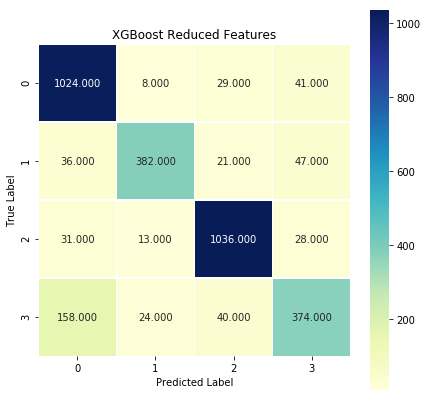

In [292]:
cm_xgbimp = confusion_matrix(y_test, pred_test_xgbimp)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgbimp, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('XGBoost Reduced Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### With Upsampling

In [254]:
xgbsm = XGBClassifier(objective='multi:softmax',booster='gbtree',learning_rate=.1, n_estimators=200)

In [255]:
params_xgbsm = dict(max_depth=[5,10,15])

In [256]:
rs_xgbsm = GridSearchCV(xgbsm, params_xgbsm, cv=10,scoring='accuracy', verbose=5, n_jobs=-1)

In [257]:
rs_xgbsm.fit(X_train_sm,y_train_sm)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 33.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 33.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=5)

In [258]:
rs_xgbsm.best_params_

{'max_depth': 10}

In [263]:
pred_train_xgbsm = rs_xgbsm.best_estimator_.predict(X_train_sm)
# pred_test_xgbsm = rs_xgbsm.best_estimator_.predict(X_test)

In [265]:
print('Accuracy train: ', accuracy_score(y_train_sm, pred_train_xgbsm))
# print('Accuracy test: ', accuracy_score(y_test, pred_test_xgbsm))

Accuracy train:  0.9982202447163515


In [ ]:
cm_xgbsm = confusion_matrix(y_test, pred_test_xgbsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgbsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [266]:
X_train_sm

array([[ 1.00000000e+00,  2.00000000e+00,  2.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  3.00000000e+00,  4.00000000e+00, ...,
         7.50000000e+01,  2.83500000e+01,  9.45000000e+00],
       [ 0.00000000e+00,  3.00000000e+00,  4.00000000e+00, ...,
         4.95000000e+02,  1.75500000e+01,  1.07250000e+02],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  5.50000000e+00,  0.00000000e+00],
       [ 3.41611697e-01,  6.83223395e-01,  4.34161170e+00, ...,
         6.58388303e-01,  6.59046691e+00,  1.34363653e+01],
       [ 0.00000000e+00,  4.00000000e+00,  4.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00, -5.00000000e+00]])

In [267]:
X_train

,Type,Sex,Size,Intake Type,Intake Subtype,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,Days in Shelter,IntakeAgeYrs,Type Sex,Type Size,Type Intake Type,Type Intake Subtype,Type Intake Condition,Type Intake Jurisdiction,Type PredomBreed,Type PredomColor,Type Days in Shelter,Type IntakeAgeYrs,Sex Size,Sex Intake Type,Sex Intake Subtype,Sex Intake Condition,Sex Intake Jurisdiction,Sex PredomBreed,Sex PredomColor,Sex Days in Shelter,Sex IntakeAgeYrs,Size Intake Type,Size Intake Subtype,Size Intake Condition,Size Intake Jurisdiction,Size PredomBreed,Size PredomColor,Size Days in Shelter,Size IntakeAgeYrs,Intake Type Intake Subtype,Intake Type Intake Condition,Intake Type Intake Jurisdiction,Intake Type PredomBreed,Intake Type PredomColor,Intake Type Days in Shelter,Intake Type IntakeAgeYrs,Intake Subtype Intake Condition,Intake Subtype Intake Jurisdiction,Intake Subtype PredomBreed,Intake Subtype PredomColor,Intake Subtype Days in Shelter,Intake Subtype IntakeAgeYrs,Intake Condition Intake Jurisdiction,Intake Condition PredomBreed,Intake Condition PredomColor,Intake Condition Days in Shelter,Intake Condition IntakeAgeYrs,Intake Jurisdiction PredomBreed,Intake Jurisdiction PredomColor,Intake Jurisdiction Days in Shelter,Intake Jurisdiction IntakeAgeYrs,PredomBreed PredomColor,PredomBreed Days in Shelter,PredomBreed IntakeAgeYrs,PredomColor Days in Shelter,PredomColor IntakeAgeYrs,Days in Shelter IntakeAgeYrs
13408,1.0,2.0,2.0,4.0,2.0,0.0,8.0,8.0,0.0,0.0,1.02,2.0,2.0,4.0,2.0,0.0,8.0,8.0,0.0,0.0,1.02,4.0,8.0,4.0,0.0,16.0,16.0,0.0,0.0,2.04,8.0,4.0,0.0,16.0,16.0,0.0,0.0,2.04,8.0,0.0,32.0,32.0,0.0,0.0,4.08,0.0,16.0,16.0,0.0,0.0,2.04,0.0,0.0,0.0,0.0,0.00,64.0,0.0,0.0,8.16,0.0,0.0,8.16,0.0,0.00,0.00
5815,1.0,3.0,4.0,1.0,9.0,0.0,10.0,15.0,15.0,5.0,1.89,3.0,4.0,1.0,9.0,0.0,10.0,15.0,15.0,5.0,1.89,12.0,3.0,27.0,0.0,30.0,45.0,45.0,15.0,5.67,4.0,36.0,0.0,40.0,60.0,60.0,20.0,7.56,9.0,0.0,10.0,15.0,15.0,5.0,1.89,0.0,90.0,135.0,135.0,45.0,17.01,0.0,0.0,0.0,0.0,0.00,150.0,150.0,50.0,18.90,225.0,75.0,28.35,75.0,28.35,9.45
2578,0.0,3.0,4.0,2.0,13.0,0.0,12.0,22.0,9.0,55.0,1.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.0,6.0,39.0,0.0,36.0,66.0,27.0,165.0,5.85,8.0,52.0,0.0,48.0,88.0,36.0,220.0,7.80,26.0,0.0,24.0,44.0,18.0,110.0,3.90,0.0,156.0,286.0,117.0,715.0,25.35,0.0,0.0,0.0,0.0,0.00,264.0,108.0,660.0,23.40,198.0,1210.0,42.90,495.0,17.55,107.25
7315,1.0,2.0,4.0,4.0,13.0,0.0,10.0,15.0,0.0,9.0,0.21,2.0,4.0,4.0,13.0,0.0,10.0,15.0,0.0,9.0,0.21,8.0,8.0,26.0,0.0,20.0,30.0,0.0,18.0,0.42,16.0,52.0,0.0,40.0,60.0,0.0,36.0,0.84,52.0,0.0,40.0,60.0,0.0,36.0,0.84,0.0,130.0,195.0,0.0,117.0,2.73,0.0,0.0,0.0,0.0,0.00,150.0,0.0,90.0,2.10,0.0,135.0,3.15,0.0,0.00,1.89
4035,1.0,2.0,3.0,0.0,13.0,0.0,9.0,42.0,18.0,3.0,0.27,2.0,3.0,0.0,13.0,0.0,9.0,42.0,18.0,3.0,0.27,6.0,0.0,26.0,0.0,18.0,84.0,36.0,6.0,0.54,0.0,39.0,0.0,27.0,126.0,54.0,9.0,0.81,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,117.0,546.0,234.0,39.0,3.51,0.0,0.0,0.0,0.0,0.00,378.0,162.0,27.0,2.43,756.0,126.0,11.34,54.0,4.86,0.81
4948,1.0,3.0,1.0,4.0,2.0,0.0,8.0,13.0,2.0,2.0,8.00,3.0,1.0,4.0,2.0,0.0,8.0,13.0,2.0,2.0,8.00,3.0,12.0,6.0,0.0,24.0,39.0,6.0,6.0,24.00,4.0,2.0,0.0,8.0,13.0,2.0,2.0,8.00,8.0,0.0,32.0,52.0,8.0,8.0,32.00,0.0,16.0,26.0,4.0,4.0,16.00,0.0,0.0,0.0,0.0,0.00,104.0,16.0,16.0,64.00,26.0,26.0,104.00,4.0,16.00,16.00
6137,1.0,3.0,5.0,4.0,13.0,0.0,10.0,15.0,0.0,28.0,0.52,3.0,5.0,4.0,13.0,0.0,10.0,15.0,0.0,28.0,0.52,15.0,12.0,39.0,0.0,30.0,45.0,0.0,84.0,1.56,20.0,65.0,0.0,50.0,75.0,0.0,140.0,2.60,52.0,0.0,40.0,60.0,0.0,112.0,2.08,0.0,130.0,195.0,0.0,364.0,6.76,0.0,0.0,0.0,0.0,0.00,150.0,0.0,280.0,5.20,0.0,420.0,7.80,0.0,0.00,14.56
1201,0.0,4.0,0.0,4.0,1.0,4.0,8.0,22.0,9.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,16.0,4.0,16.0,32.0,88.0,36.0,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0,16.0,32.0,88.0,36.0,0.0,2.00,4.0,8.0,22.0,9.0,0.0,0.50,32.0,88.0,36.0,0.0,2.00,176.0,72.0,0.0,4.00,198.0,0.0,11.00,0.0,4.50,0.00
5284,1.0,2.0,4.0,2.0,2.0,0.0,8.0,15.0,2.0,32.0,0.97,2.0,4.0,2.0,2.0,0.0,8.

In [300]:
len(modeling.columns)

67

In [299]:
len(y_test)+len(y_train)

16457

In [301]:
modeling.columns

Index(['Type', 'Sex', 'Size', 'Intake Type', 'Intake Subtype',
       'Intake Condition', 'Intake Jurisdiction', 'PredomBreed', 'PredomColor',
       'Days in Shelter', 'IntakeAgeYrs', 'Type Sex', 'Type Size',
       'Type Intake Type', 'Type Intake Subtype', 'Type Intake Condition',
       'Type Intake Jurisdiction', 'Type PredomBreed', 'Type PredomColor',
       'Type Days in Shelter', 'Type IntakeAgeYrs', 'Sex Size',
       'Sex Intake Type', 'Sex Intake Subtype', 'Sex Intake Condition',
       'Sex Intake Jurisdiction', 'Sex PredomBreed', 'Sex PredomColor',
       'Sex Days in Shelter', 'Sex IntakeAgeYrs', 'Size Intake Type',
       'Size Intake Subtype', 'Size Intake Condition',
       'Size Intake Jurisdiction', 'Size PredomBreed', 'Size PredomColor',
       'Size Days in Shelter', 'Size IntakeAgeYrs',
       'Intake Type Intake Subtype', 'Intake Type Intake Condition',
       'Intake Type Intake Jurisdiction', 'Intake Type PredomBreed',
       'Intake Type PredomColor', 'Intake 

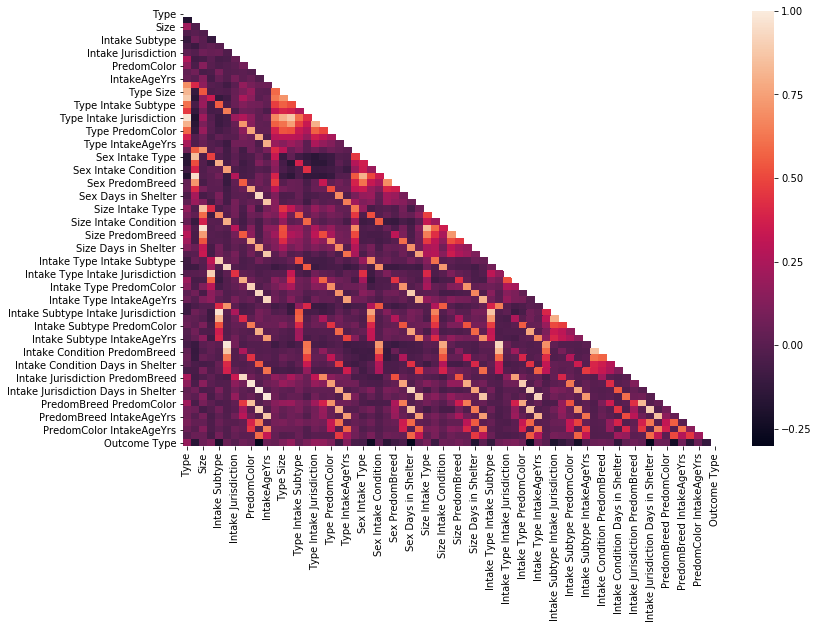

In [304]:
plt.figure(figsize=(12,8))
mask = np.zeros_like(modeling.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(modeling.corr(), mask=mask)